In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
sales = pd.read_csv( 'data/bike_sales.csv', parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
# Assuming you have already loaded the data into a DataFrame named 'sales'
mean_customer_age = sales['Customer_Age'].mean()
print("Mean Customer Age:", mean_customer_age)

Mean Customer Age: 35.91921157861212


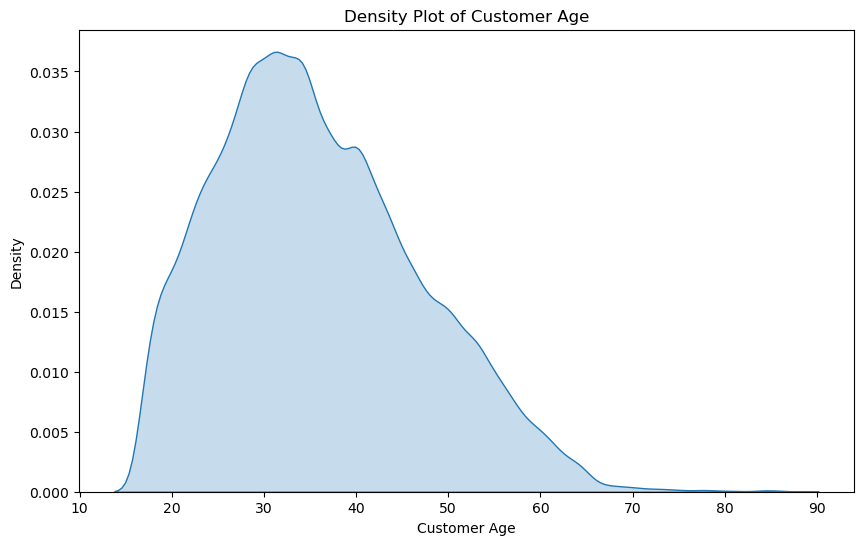

In [7]:
import seaborn as sns

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales['Customer_Age'], fill=True)
plt.title('Density Plot of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.show()



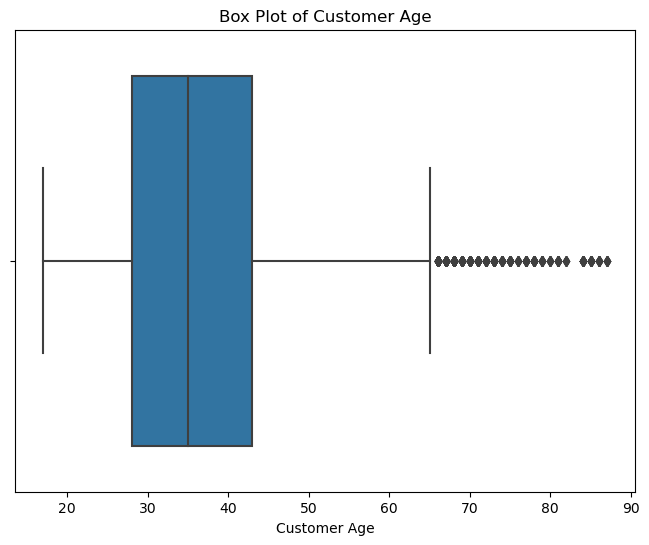

In [8]:

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=sales['Customer_Age'])
plt.title('Box Plot of Customer Age')
plt.xlabel('Customer Age')
plt.show()

In [9]:
mean_order_quantity = sales['Order_Quantity'].mean()
print("Mean Order Quantity:", mean_order_quantity)

Mean Order Quantity: 11.901659648253654


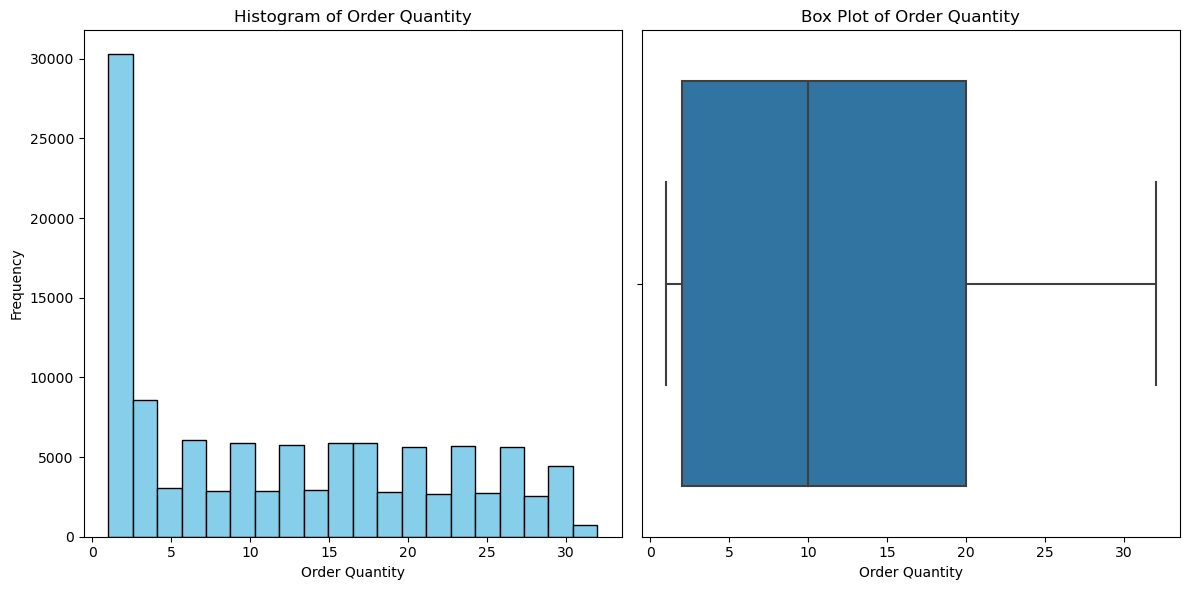

In [10]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axes[0].hist(sales['Order_Quantity'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Order Quantity')
axes[0].set_xlabel('Order Quantity')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=sales['Order_Quantity'], ax=axes[1])
axes[1].set_title('Box Plot of Order Quantity')
axes[1].set_xlabel('Order Quantity')

plt.tight_layout()
plt.show()

In [11]:
# Assuming the 'Date' column is in datetime format
sales['Year'] = sales['Date'].dt.year

# Group by year and count the number of sales
sales_per_year = sales.groupby('Year').size()

print("Sales per Year:")
print(sales_per_year)


Sales per Year:
Year
2011     2677
2012     2677
2013    24443
2014    29398
2015    24443
2016    29398
dtype: int64


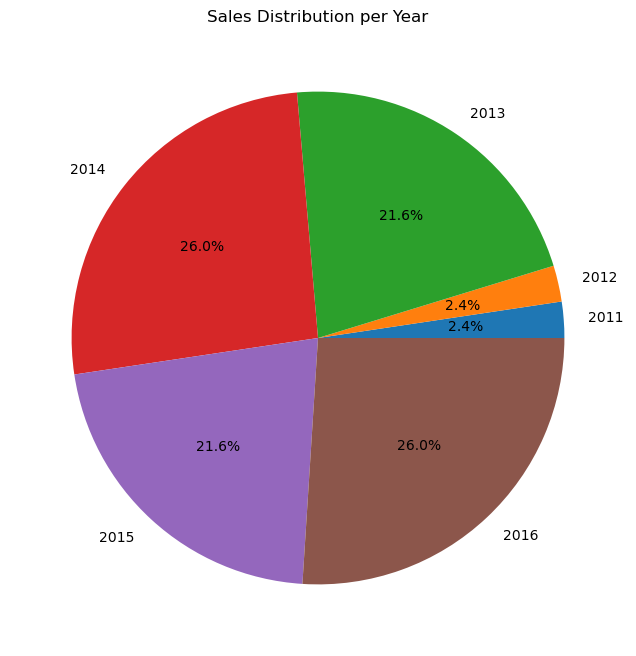

In [12]:
# Assuming you have already calculated sales_per_year
sales_per_year.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sales Distribution per Year')
plt.ylabel('')
plt.show()

In [13]:
# Assuming the 'Date' column is in datetime format
sales['Month'] = sales['Date'].dt.month

# Group by month and count the number of sales
sales_per_month = sales.groupby('Month').size()

print("Sales per Month:")
print(sales_per_month)

Sales per Month:
Month
1      9284
2      9022
3      9674
4     10182
5     11128
6     11234
7      7462
8      8200
9      8166
10     8750
11     8734
12    11200
dtype: int64


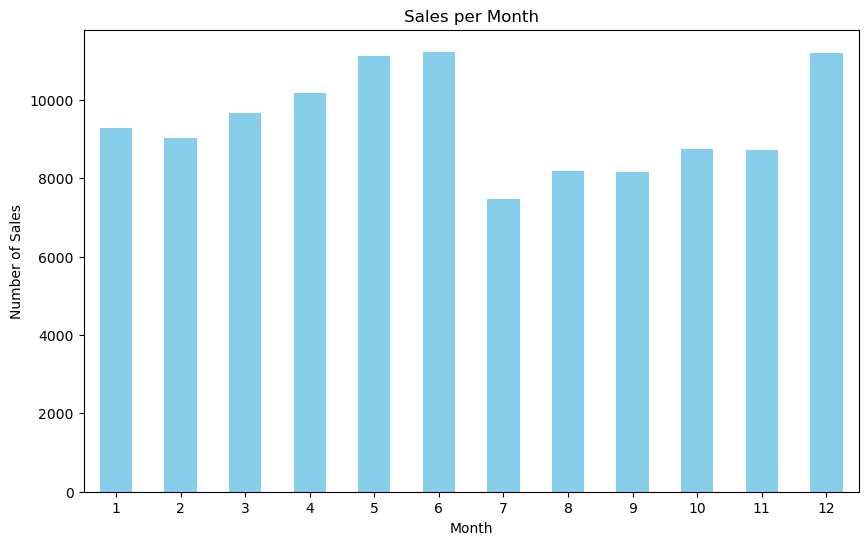

In [14]:
# Assuming you have already calculated sales_per_month
sales_per_month.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [15]:
# Group by country and sum up the sales quantity
sales_per_country = sales.groupby('Country')['Order_Quantity'].sum()

# Find the country with the maximum sales quantity
country_with_most_sales = sales_per_country.idxmax()
max_sales_quantity = sales_per_country.max()

print("Country with the most sales quantity:", country_with_most_sales)
print("Sales quantity in that country:", max_sales_quantity)

Country with the most sales quantity: United States
Sales quantity in that country: 477539


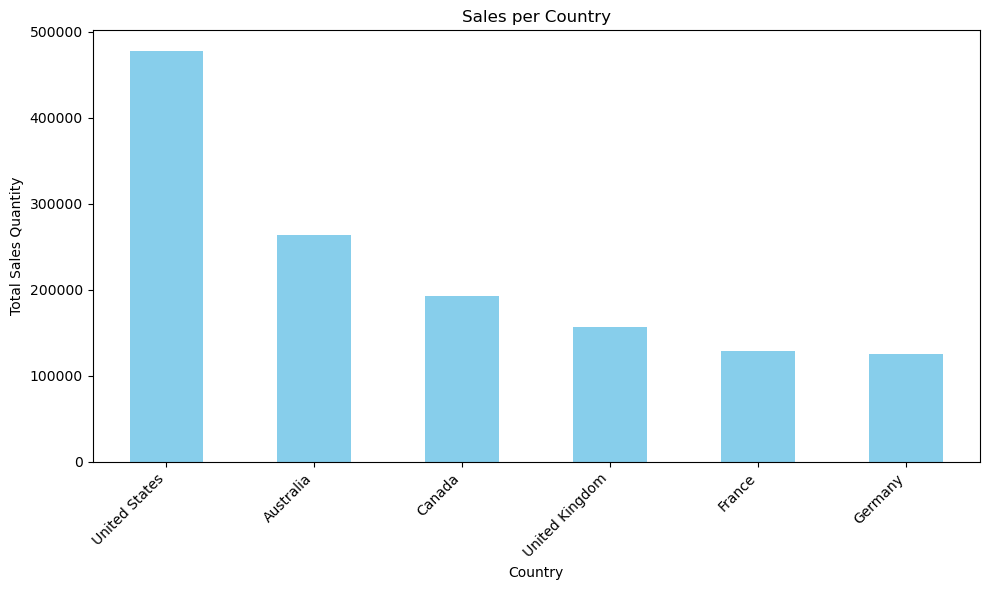

In [16]:
# Group by country and sum up the sales quantity
sales_per_country = sales.groupby('Country')['Order_Quantity'].sum()

# Sort the sales per country in descending order
sales_per_country = sales_per_country.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sales_per_country.plot(kind='bar', color='skyblue')
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
# Extract unique products
products_sold = sales['Product'].unique()

# Convert to list if needed
products_sold_list = products_sold.tolist()

print("List of every product sold:")
print(products_sold_list)


List of every product sold:
['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand', 'Mountain Bottle Cage', 'Water Bottle - 30 oz.', 'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver', 'Fender Set - Mountain', 'Half-Finger Gloves, L', 'Half-Finger Gloves, M', 'Half-Finger Gloves, S', 'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red', 'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.', 'Short-Sleeve Classic Jersey, XL', 'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M', 'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M', 'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L', 'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38', 'Mountain-100 Silver, 44', 'Mountain-100 Black, 48', 'Mountain-100 Silver, 48', 'Mountain-100 Black, 38', 'Mountain-200 Silver, 38', 'Mountain-100 Black, 44', 'Mountain-100 Silver, 42', 'Mountain-200 Black, 46', 'Mountain-200 Silver, 42', 'Mountain-200 Silver, 46', 'Mountain-200 Black, 38', 'Mountain-100 Black, 42', 'Mou

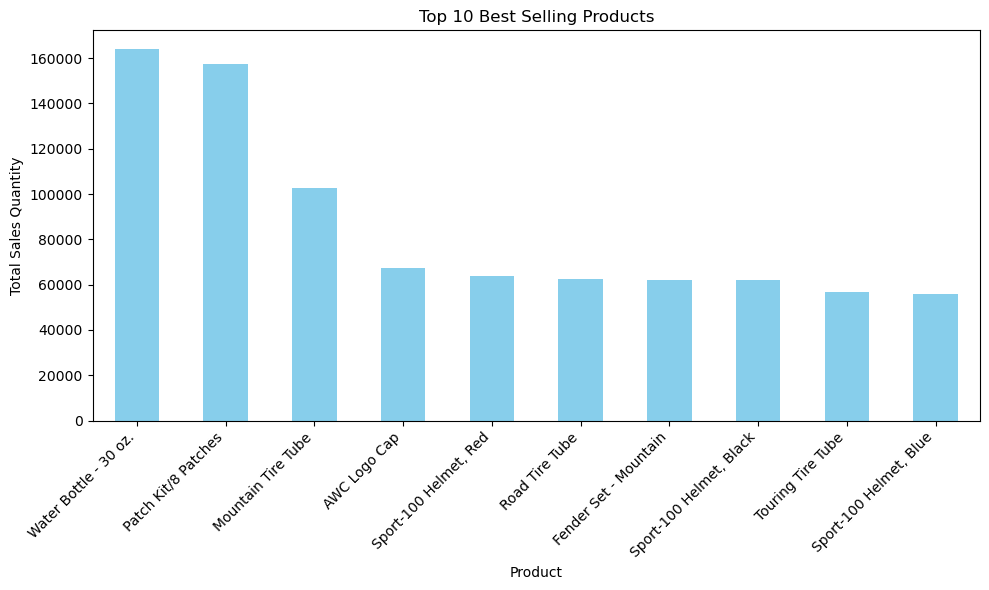

In [18]:
# Group by product and sum up the sales quantity
sales_per_product = sales.groupby('Product')['Order_Quantity'].sum()

# Select the top 10 best selling products
top_10_products = sales_per_product.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

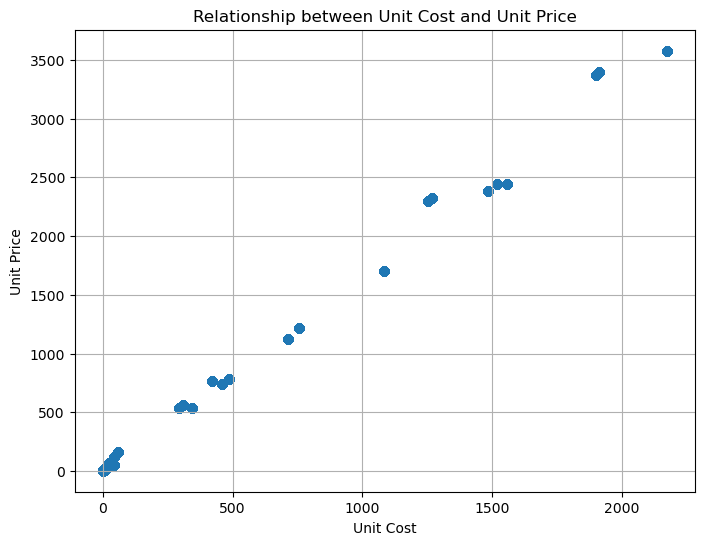

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(sales['Unit_Cost'], sales['Unit_Price'], alpha=0.5)
plt.title('Relationship between Unit Cost and Unit Price')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

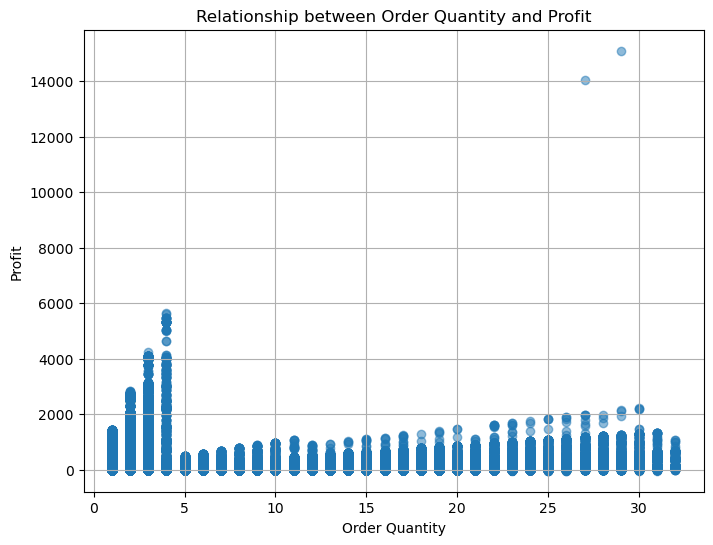

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(sales['Order_Quantity'], sales['Profit'], alpha=0.5)
plt.title('Relationship between Order Quantity and Profit')
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

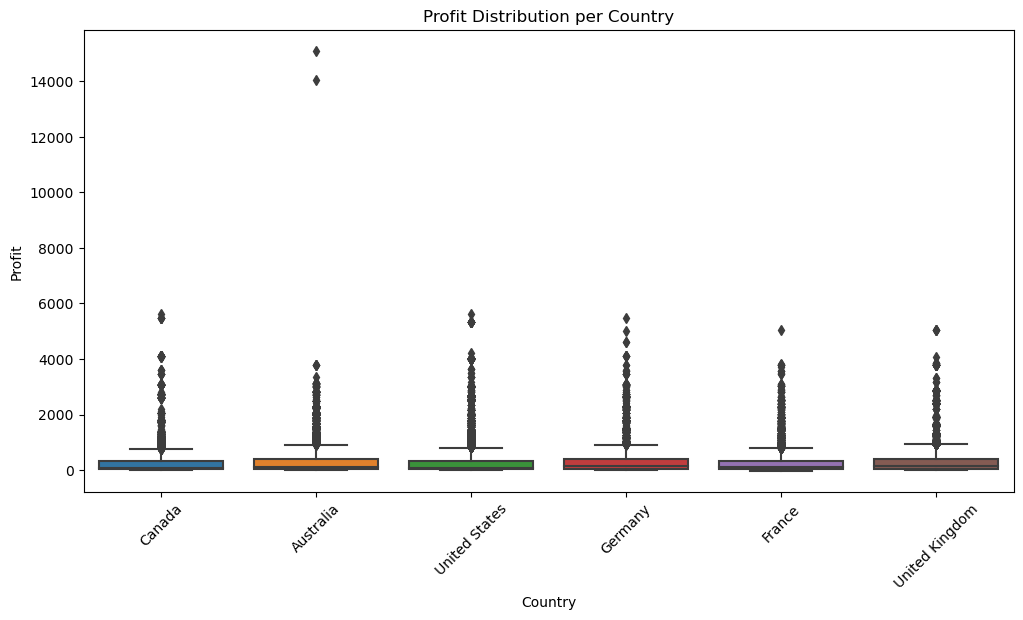

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Profit', data=sales)
plt.title('Profit Distribution per Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

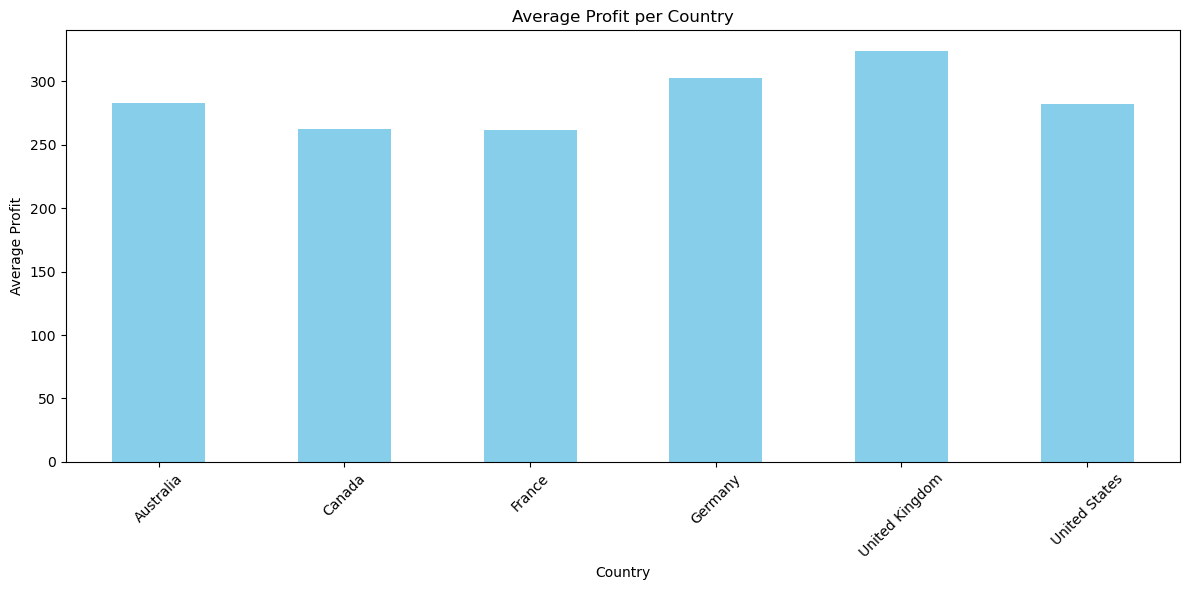

In [22]:
# Group by country and calculate mean profit
profit_per_country = sales.groupby('Country')['Profit'].mean()

plt.figure(figsize=(12, 6))
profit_per_country.plot(kind='bar', color='skyblue')
plt.title('Average Profit per Country')
plt.xlabel('Country')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

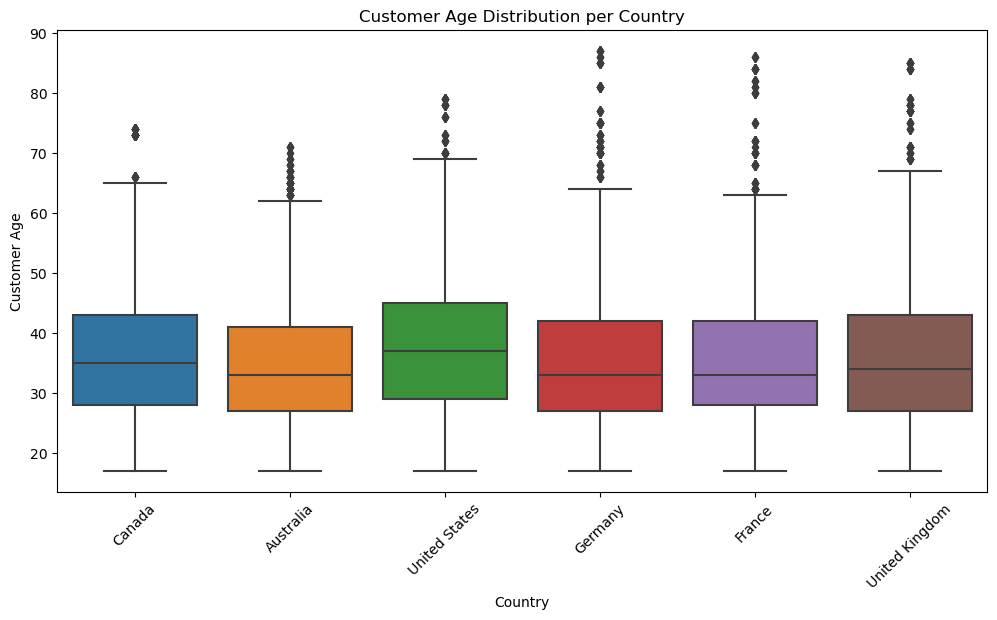

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Customer_Age', data=sales)
plt.title('Customer Age Distribution per Country')
plt.xlabel('Country')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()

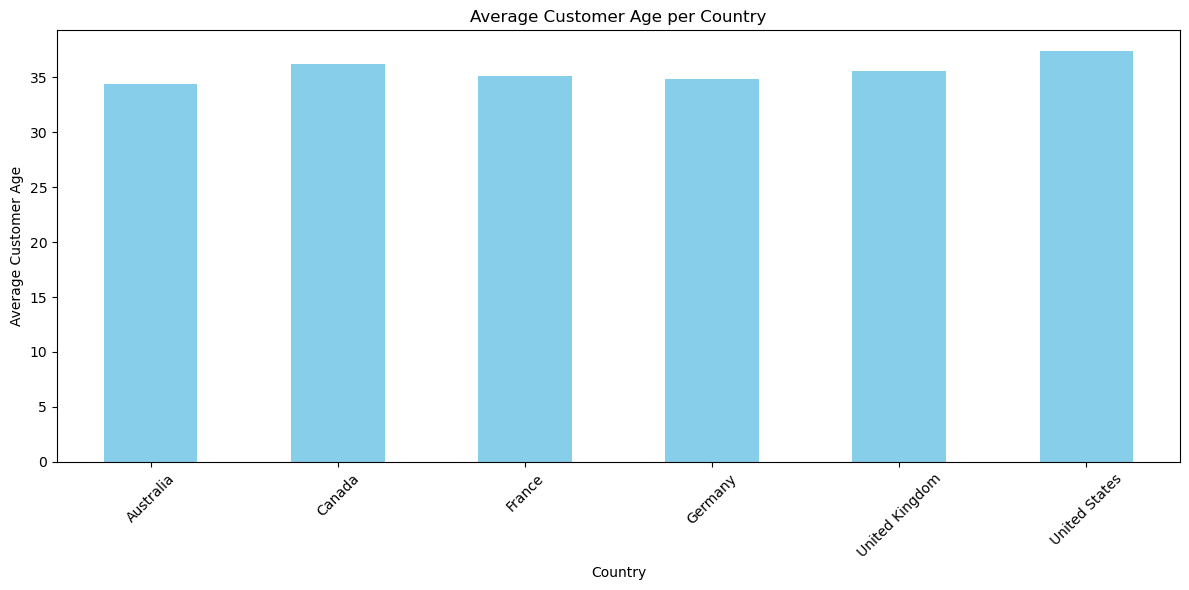

In [24]:
# Group by country and calculate mean customer age
age_per_country = sales.groupby('Country')['Customer_Age'].mean()

plt.figure(figsize=(12, 6))
age_per_country.plot(kind='bar', color='skyblue')
plt.title('Average Customer Age per Country')
plt.xlabel('Country')
plt.ylabel('Average Customer Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Assuming 'Day', 'Month', and 'Year' columns exist
sales['Calculated_Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']])

# Display the DataFrame with the new column
print(sales.head())

        Date  Day  Month  Year  Customer_Age       Age_Group Customer_Gender  \
0 2013-11-26   26     11  2013            19     Youth (<25)               M   
1 2015-11-26   26     11  2015            19     Youth (<25)               M   
2 2014-03-23   23      3  2014            49  Adults (35-64)               M   
3 2016-03-23   23      3  2016            49  Adults (35-64)               M   
4 2014-05-15   15      5  2014            47  Adults (35-64)               F   

     Country             State Product_Category Sub_Category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45      

In [27]:
# Assuming 'Calculated_Date' column is in string format
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

# Display the DataFrame with the parsed column
print(sales.head())

        Date  Day  Month  Year  Customer_Age       Age_Group Customer_Gender  \
0 2013-11-26   26     11  2013            19     Youth (<25)               M   
1 2015-11-26   26     11  2015            19     Youth (<25)               M   
2 2014-03-23   23      3  2014            49  Adults (35-64)               M   
3 2016-03-23   23      3  2016            49  Adults (35-64)               M   
4 2014-05-15   15      5  2014            47  Adults (35-64)               F   

     Country             State Product_Category Sub_Category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45      

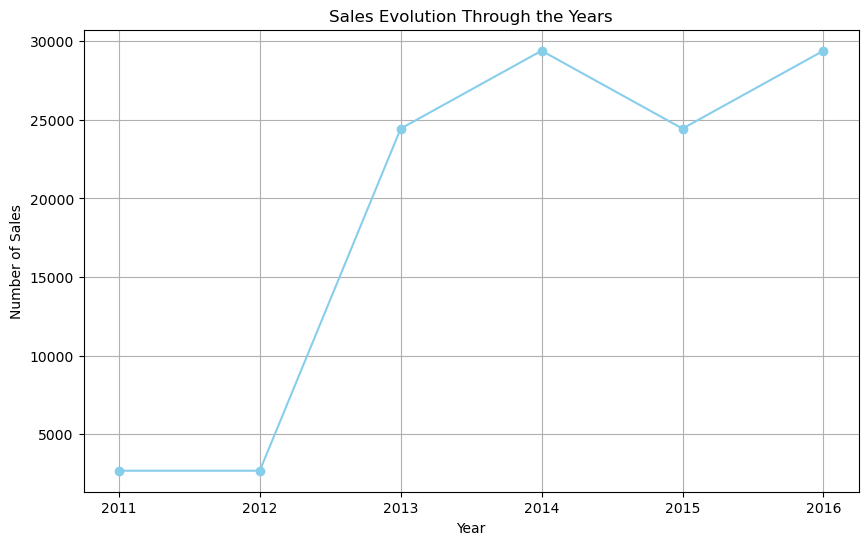

In [28]:
# Group sales by year and count the number of sales
sales_by_year = sales.groupby(sales['Calculated_Date'].dt.year).size()

# Plotting
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Sales Evolution Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

In [29]:
# Assuming 'Revenue' column exists in your DataFrame
sales['Revenue'] += 50

# Display the DataFrame with updated revenue
print(sales.head())


        Date  Day  Month  Year  Customer_Age       Age_Group Customer_Gender  \
0 2013-11-26   26     11  2013            19     Youth (<25)               M   
1 2015-11-26   26     11  2015            19     Youth (<25)               M   
2 2014-03-23   23      3  2014            49  Adults (35-64)               M   
3 2016-03-23   23      3  2016            49  Adults (35-64)               M   
4 2014-05-15   15      5  2014            47  Adults (35-64)               F   

     Country             State Product_Category Sub_Category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45      

In [30]:
# Assuming 'Country' column exists in your DataFrame
orders_in_canada_or_france = sales[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]

# Count the number of orders
num_orders_in_canada_or_france = len(orders_in_canada_or_france)

print("Number of orders made in Canada or France:", num_orders_in_canada_or_france)


Number of orders made in Canada or France: 25176


In [32]:
# Assuming 'Product' and 'Country' columns exist in your DataFrame
bike_racks_orders_canada = sales[(sales['Sub_Category'] == 'Bike Racks') & (sales['Country'] == 'Canada')]

# Count the number of Bike Racks orders made from Canada
num_bike_racks_orders_canada = len(bike_racks_orders_canada)

print("Number of Bike Racks orders made from Canada:", num_bike_racks_orders_canada)


Number of Bike Racks orders made from Canada: 104


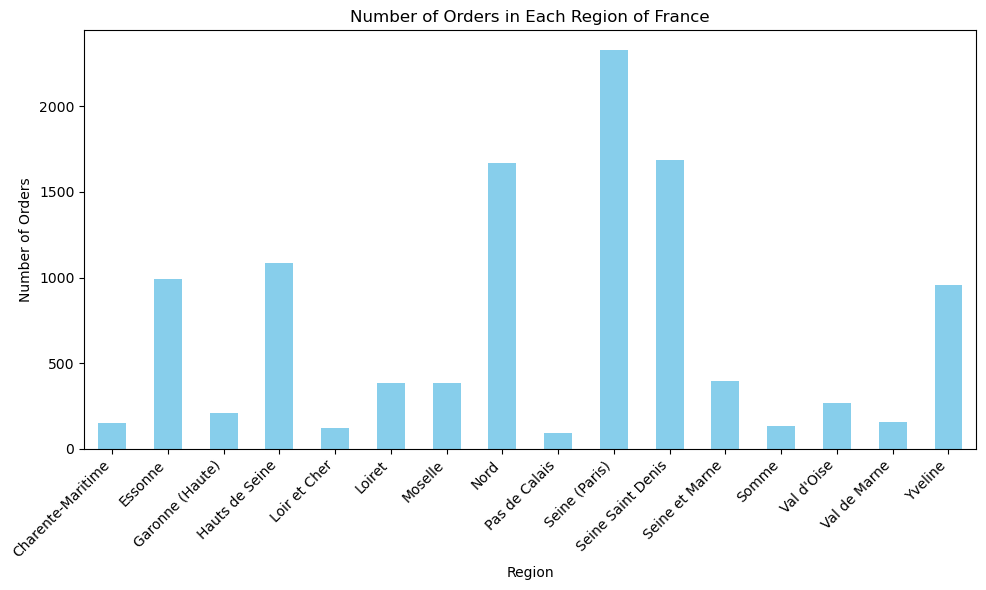

In [34]:
# Assuming 'Region' and 'Country' columns exist in your DataFrame
orders_in_france = sales[sales['Country'] == 'France']
orders_per_region = orders_in_france.groupby('State').size()

# Plotting
plt.figure(figsize=(10, 6))
orders_per_region.plot(kind='bar', color='skyblue')
plt.title('Number of Orders in Each Region of France')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [36]:
# Group by category and count the number of sales
sales_per_category = sales.groupby('Product_Category').size()

print("Sales per Category:")
print(sales_per_category)


Sales per Category:
Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
dtype: int64


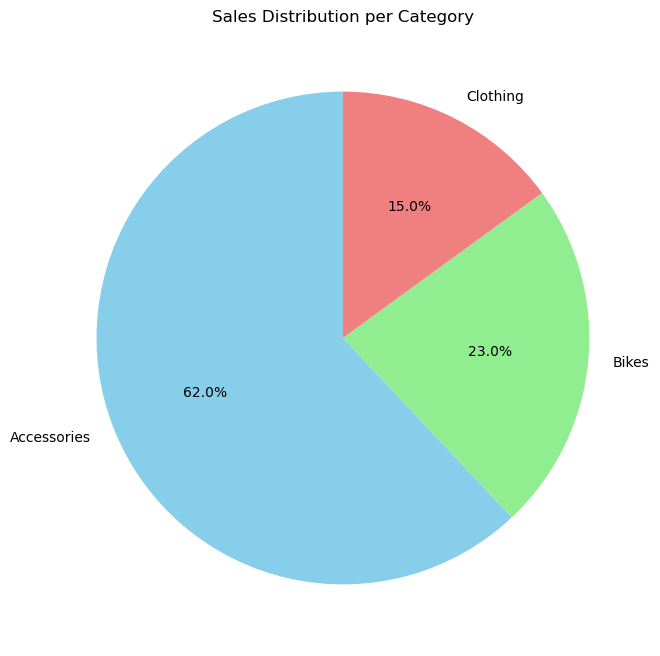

In [37]:
# Assuming you have already calculated sales_per_category
plt.figure(figsize=(8, 8))
sales_per_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Sales Distribution per Category')
plt.ylabel('')
plt.show()

In [38]:
# Filter the DataFrame to include only accessory products
accessory_orders = sales[sales['Product_Category'] == 'Accessories']

# Group by sub-category and count the number of orders
orders_per_subcategory = accessory_orders.groupby('Sub_Category').size()

print("Orders per Accessory Sub-category:")
print(orders_per_subcategory)


Orders per Accessory Sub-category:
Sub_Category
Bike Racks             592
Bike Stands            456
Bottles and Cages    15876
Cleaners              1802
Fenders               4032
Helmets              12158
Hydration Packs       1334
Tires and Tubes      33870
dtype: int64


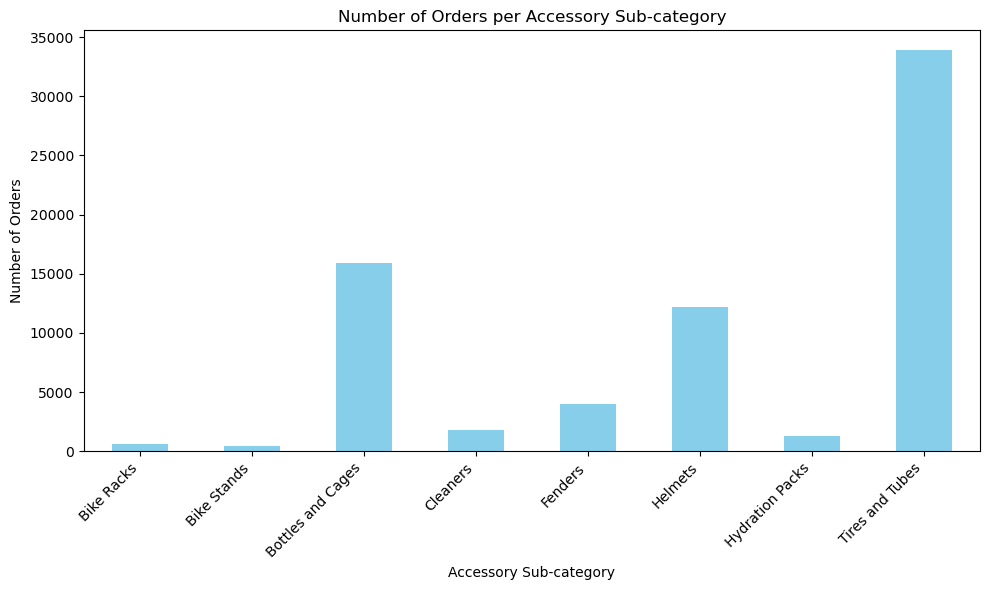

In [39]:
# Assuming you have already calculated orders_per_subcategory
plt.figure(figsize=(10, 6))
orders_per_subcategory.plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Accessory Sub-category')
plt.xlabel('Accessory Sub-category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [40]:
# Filter the DataFrame to include only bike products
bike_orders = sales[sales['Product_Category'] == 'Bikes']

# Group by sub-category and count the number of orders
orders_per_bike_subcategory = bike_orders.groupby('Sub_Category').size()

print("Orders per Bike Sub-category:")
print(orders_per_bike_subcategory)


Orders per Bike Sub-category:
Sub_Category
Mountain Bikes     8854
Road Bikes        13430
Touring Bikes      3698
dtype: int64


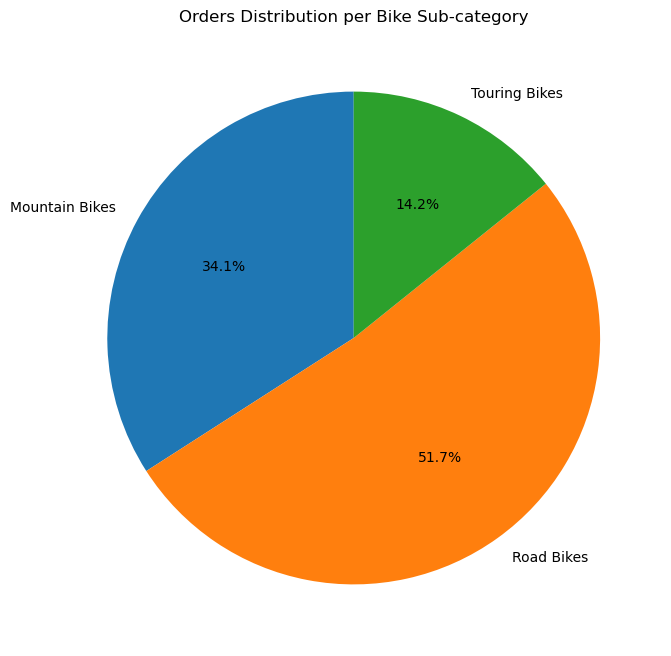

In [41]:
# Assuming you have already calculated orders_per_bike_subcategory
plt.figure(figsize=(8, 8))
orders_per_bike_subcategory.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Orders Distribution per Bike Sub-category')
plt.ylabel('')
plt.show()

In [42]:
# Group by gender and sum up the total sales amount
sales_per_gender = sales.groupby('Customer_Gender')['Revenue'].sum()

# Find the gender with the maximum sales amount
gender_with_most_sales = sales_per_gender.idxmax()
max_sales_amount = sales_per_gender.max()

print("Gender with the most amount of sales:", gender_with_most_sales)
print("Total sales amount for that gender:", max_sales_amount)


Gender with the most amount of sales: M
Total sales amount for that gender: 46251009


In [43]:
# Assuming 'Gender' and 'Revenue' columns exist in your DataFrame
sales_by_men_above_500 = sales[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] > 500)]

# Count the number of sales
num_sales_by_men_above_500 = len(sales_by_men_above_500)

print("Number of sales with more than $500 in revenue made by men:", num_sales_by_men_above_500)


Number of sales with more than $500 in revenue made by men: 23342


In [44]:
# Sort the DataFrame by 'Revenue' column in descending order
top_5_sales = sales.sort_values(by='Revenue', ascending=False).head(5)

print("Top 5 sales with the highest revenue:")
print(top_5_sales)


Top 5 sales with the highest revenue:
             Date  Day  Month  Year  Customer_Age       Age_Group  \
112073 2015-07-24   24      7  2015            52  Adults (35-64)   
112072 2013-07-24   24      7  2013            52  Adults (35-64)   
71129  2011-07-08    8      7  2011            22     Youth (<25)   
70307  2011-04-30   30      4  2011            44  Adults (35-64)   
70601  2011-09-30   30      9  2011            19     Youth (<25)   

       Customer_Gender    Country             State Product_Category  \
112073               M  Australia        Queensland         Clothing   
112072               M  Australia        Queensland         Clothing   
71129                M     Canada           Alberta            Bikes   
70307                M     Canada  British Columbia            Bikes   
70601                F     Canada  British Columbia            Bikes   

       Sub_Category                  Product  Order_Quantity  Unit_Cost  \
112073        Vests  Touring-1000 Yello

In [45]:
# Find the index of the sale with the highest revenue
idx_max_revenue = sales['Revenue'].idxmax()

# Get the sale with the highest revenue
sale_highest_revenue = sales.loc[idx_max_revenue]

print("Sale with the highest revenue:")
print(sale_highest_revenue)


Sale with the highest revenue:
Date                    2015-07-24 00:00:00
Day                                      24
Month                                     7
Year                                   2015
Customer_Age                             52
Age_Group                    Adults (35-64)
Customer_Gender                           M
Country                           Australia
State                            Queensland
Product_Category                   Clothing
Sub_Category                          Vests
Product             Touring-1000 Yellow, 50
Order_Quantity                           29
Unit_Cost                              1482
Unit_Price                             2384
Profit                                15096
Cost                                  42978
Revenue                               58124
Calculated_Date         2015-07-24 00:00:00
Name: 112073, dtype: object


In [46]:
# Filter the DataFrame to include only orders with less than $10,000 in revenue
orders_less_than_10k_revenue = sales[sales['Revenue'] < 10000]

# Calculate the mean Order_Quantity
mean_order_quantity_less_than_10k = orders_less_than_10k_revenue['Order_Quantity'].mean()

print("Mean Order_Quantity of orders with less than $10,000 in revenue:", mean_order_quantity_less_than_10k)


Mean Order_Quantity of orders with less than $10,000 in revenue: 11.914539380997528


In [47]:
# Filter the DataFrame to include only orders made in May 2016
orders_in_may_2016 = sales[(sales['Calculated_Date'].dt.month == 5) & (sales['Calculated_Date'].dt.year == 2016)]

# Count the number of orders
num_orders_in_may_2016 = len(orders_in_may_2016)

print("Number of orders made in May 2016:", num_orders_in_may_2016)


Number of orders made in May 2016: 5015


In [48]:
# Define the tax rate
tax_rate = 0.072  # 7.2%

# Update the Unit_Price column for sales within the United States
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= (1 + tax_rate)

# Display the updated DataFrame
print(sales.head())


        Date  Day  Month  Year  Customer_Age       Age_Group Customer_Gender  \
0 2013-11-26   26     11  2013            19     Youth (<25)               M   
1 2015-11-26   26     11  2015            19     Youth (<25)               M   
2 2014-03-23   23      3  2014            49  Adults (35-64)               M   
3 2016-03-23   23      3  2016            49  Adults (35-64)               M   
4 2014-05-15   15      5  2014            47  Adults (35-64)               F   

     Country             State Product_Category Sub_Category  \
0     Canada  British Columbia      Accessories   Bike Racks   
1     Canada  British Columbia      Accessories   Bike Racks   
2  Australia   New South Wales      Accessories   Bike Racks   
3  Australia   New South Wales      Accessories   Bike Racks   
4  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45      